# Ford GoBike System Data Exploratory Analysis
#### by Manthan Patel

## Data Wrangling

> The Ford GoBike System Data contains the Bay Wheels's trip data which includes information such as Trip Duration, Start Time, End Time,Station IDs, Bike ID and so on. We will first load our data into a pandas dataframe below to explore the data we have and then perform some preliminary data wrangling to make our dataset clean.

In [126]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [127]:
df_fordgobike = pd.read_csv('201911-baywheels-tripdata.csv')

C:\Manthan\Softwares\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [128]:
df_fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185496 entries, 0 to 185495
Data columns (total 15 columns):
duration_sec               185496 non-null int64
start_time                 185496 non-null object
end_time                   185496 non-null object
start_station_id           184573 non-null float64
start_station_name         184574 non-null object
start_station_latitude     185496 non-null float64
start_station_longitude    185496 non-null float64
end_station_id             184524 non-null float64
end_station_name           184524 non-null object
end_station_latitude       185496 non-null float64
end_station_longitude      185496 non-null float64
bike_id                    185496 non-null int64
user_type                  185496 non-null object
bike_share_for_all_trip    184086 non-null object
rental_access_method       1410 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 21.2+ MB


In [129]:
df_fordgobike.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
45214,391,2019-11-20 16:53:16.7930,2019-11-20 16:59:48.5840,79.0,7th St at Brannan St,37.773492,-122.403673,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,12112,Customer,No,NaN
89165,1153,2019-11-14 11:12:52.8710,2019-11-14 11:32:06.6220,108.0,16th St Mission BART,37.764710,-122.419957,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,799,Customer,No,NaN
90870,1038,2019-11-14 08:32:34.8710,2019-11-14 08:49:53.8150,114.0,Rhode Island St at 17th St,37.764478,-122.402570,22.0,Howard St at Beale St,37.789756,-122.394643,12911,Subscriber,No,NaN
51934,1016,2019-11-19 18:20:21.2960,2019-11-19 18:37:17.9400,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,81.0,Berry St at 4th St,37.775880,-122.393170,12137,Subscriber,No,NaN
37531,709,2019-11-21 14:49:54.1820,2019-11-21 15:01:43.6020,364.0,China Basin St at 3rd St,37.772000,-122.389970,27.0,Beale St at Harrison St,37.788059,-122.391865,9896,Customer,No,NaN


First, we will convert column datatypes into appropriate ones

In [130]:
df_fordgobike.start_time = pd.to_datetime(df_fordgobike.start_time)
df_fordgobike.end_time = pd.to_datetime(df_fordgobike.end_time)

In [131]:
df_fordgobike.start_station_id = df_fordgobike.start_station_id.astype(str)
df_fordgobike.end_station_id = df_fordgobike.end_station_id.astype(str)
df_fordgobike.start_station_id = df_fordgobike.start_station_id.replace('nan',np.nan)
df_fordgobike.end_station_id = df_fordgobike.end_station_id.replace('nan',np.nan)

The rental access column represents the source of booking the bike - Through the app or through the clipper card. As we can see that the data available to us is very less, we can remove that column.

In [132]:
df_fordgobike.drop(columns=['rental_access_method'],inplace=True)

In [133]:
df_fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185496 entries, 0 to 185495
Data columns (total 14 columns):
duration_sec               185496 non-null int64
start_time                 185496 non-null datetime64[ns]
end_time                   185496 non-null datetime64[ns]
start_station_id           184573 non-null object
start_station_name         184574 non-null object
start_station_latitude     185496 non-null float64
start_station_longitude    185496 non-null float64
end_station_id             184524 non-null object
end_station_name           184524 non-null object
end_station_latitude       185496 non-null float64
end_station_longitude      185496 non-null float64
bike_id                    185496 non-null int64
user_type                  185496 non-null object
bike_share_for_all_trip    184086 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(6)
memory usage: 19.8+ MB


The final cleaning that we can perform is to drop all the entries with NaN values

In [134]:
df_fordgobike.dropna(inplace=True)

In [135]:
df_fordgobike.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
113375,1011,2019-11-11 14:53:43.066,2019-11-11 15:10:34.990,345.0,Hubbell St at 16th St,37.766483,-122.398279,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,9612,Subscriber,No
87003,585,2019-11-14 17:28:48.600,2019-11-14 17:38:33.933,91.0,Berry St at King St,37.771762,-122.398438,453.0,Brannan St at 4th St,37.777934,-122.396973,3377,Subscriber,No
40001,698,2019-11-21 08:46:38.523,2019-11-21 08:58:16.996,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,376.0,Illinois St at 20th St,37.760458,-122.387540,3366,Subscriber,No
129717,710,2019-11-08 11:04:08.527,2019-11-08 11:15:58.765,296.0,5th St at Virginia St,37.325998,-121.877120,310.0,San Fernando St at 4th St,37.335885,-121.885660,968,Subscriber,Yes
162409,1138,2019-11-04 13:54:20.148,2019-11-04 14:13:18.555,249.0,Russell St at College Ave,37.858473,-122.253253,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,1542,Subscriber,No


In [136]:
df_fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184086 entries, 0 to 184085
Data columns (total 14 columns):
duration_sec               184086 non-null int64
start_time                 184086 non-null datetime64[ns]
end_time                   184086 non-null datetime64[ns]
start_station_id           184086 non-null object
start_station_name         184086 non-null object
start_station_latitude     184086 non-null float64
start_station_longitude    184086 non-null float64
end_station_id             184086 non-null object
end_station_name           184086 non-null object
end_station_latitude       184086 non-null float64
end_station_longitude      184086 non-null float64
bike_id                    184086 non-null int64
user_type                  184086 non-null object
bike_share_for_all_trip    184086 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(6)
memory usage: 21.1+ MB


### The final structure of the dataset

> After cleaning the data and storing it in a pandas dataframe, we can see that we have 184,086 entries of trips. These trips have the following features available:
<br>Trip Duration (seconds) - numeric continunous
<br>Start Time and Date - numeric continuous(datetime)
<br>End Time and Date - numeric continuous(datetime)
<br>Start Station ID - categorical (nominal)
<br>Start Station Name - categorical (nominal)
<br>Start Station Latitude - numeric
<br>Start Station Longitude - numeric
<br>End Station ID - categorical (nominal)
<br>End Station Name - categorical (nominal)
<br>End Station Latitude - numeric
<br>End Station Longitude - numeric
<br>Bike ID - categorical (nominal)
<br>User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) - categorical (nominal)
<br>Bike Share for All (Bay Area residents who qualify for CalFresh, SFMTA Lifeline Pass, or PG&E CARE utility discount are eligible to join our **Bike Share for All program** for 5 dollars for the first year) - categorical (nominal)


### The main areas of interest to explore in the dataset:

> Through this dataset, we can explore the Ford Gobike statistics and understand what impacts the usage of rental bikes the most which would then help improve business strategies

### Features in the dataset that will help support the investigation

> Features such as the start time and end time will help us understand when do users prefer to use the gobike the most. Also, features such as the User type will help determine if regular subscribers contribute to the business. We can also make inferences of which geographic areas have the most demands through the latitude and longitude.

## Univariate Exploration

> First, we will try to understand the distribution of the data individually by plotting the features using univariate plots.

#### Duration
First we will see the distribution of our most important statistic - the duration of rental. We will do this by plotting a histogram

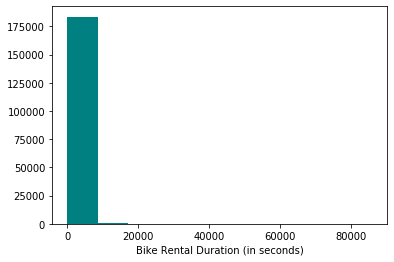

In [137]:
plt.hist(data=df_fordgobike,x='duration_sec',color='teal')
plt.xlabel('Bike Rental Duration (in seconds)');

As we can see, the data is extremely skewed. We can thus try to limit our x axis range

In [138]:
df_fordgobike.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id
count,184086.000000,184086.000000,184086.000000,184086.000000,184086.000000,184086.000000
mean,800.116679,37.765613,-122.354983,37.761898,-122.341107,8626.543789
std,1885.492081,0.105147,0.198040,0.397756,1.258548,4312.830654
min,61.000000,37.309014,-122.476104,0.000000,-122.476104,4.000000
25%,371.000000,37.769188,-122.415929,37.769218,-122.411726,3426.000000
50%,583.000000,37.778768,-122.398773,37.780450,-122.398285,10305.000000
75%,894.000000,37.795001,-122.387921,37.795392,-122.387921,11916.000000
max,85935.000000,39.892567,-75.173714,39.892567,0.000000,13112.000000


In [139]:
len(df_fordgobike[df_fordgobike.duration_sec>3000])/len(df_fordgobike)

0.013428506241647925

As we can see only 1.3% of the bikes have been rented over 3000 seconds. Thus we can plot the histogram with this limit

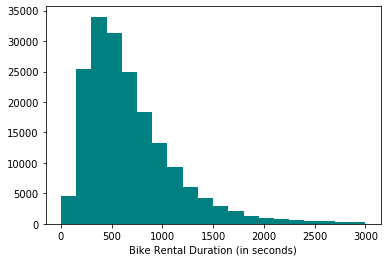

In [140]:
plt.hist(data=df_fordgobike,x='duration_sec',range=[0,3000],bins=20,color='teal')
plt.xlabel('Bike Rental Duration (in seconds)');

It will be interesting to also include the skewed values into the plot to really see how many of the values are on the extreme right. For this, we will plot the duration on a logarithmetic scale.

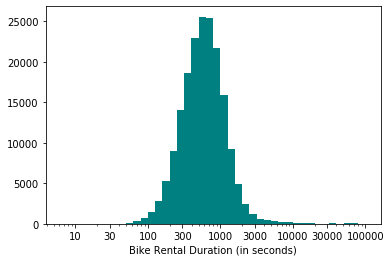

In [141]:
    bin_edges = 10 ** np.arange(0.8, np.log10(df_fordgobike.duration_sec.max())+0.1, 0.1)
    plt.hist(df_fordgobike.duration_sec, bins = bin_edges,color='teal')
    plt.xscale('log')
    tick_locs = [10, 30, 100, 300, 1000, 3000,10000,30000,100000]
    plt.xticks(tick_locs, tick_locs)
    plt.xlabel('Bike Rental Duration (in seconds)');

From the above two plots, it is seen that most of the bikes are rented for around 500 seconds which turns out to be close to 8 minutes. And very few bikes are rented for more than 30 minutes! It will be interesting to see how the amount of time spent relates to the location where the bikes get picked up from.

Now, it will be interesting to see what time do users usually use the bike rental services

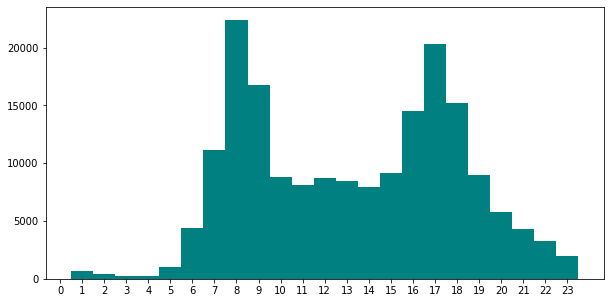

In [142]:
plt.figure(figsize=(10,5))
bins_hour = np.arange(0.5,24.5,1)
plt.hist(df_fordgobike.start_time.apply(lambda x : x.hour),bins=bins_hour,color='teal')
plt.xticks(np.arange(0,24,1));

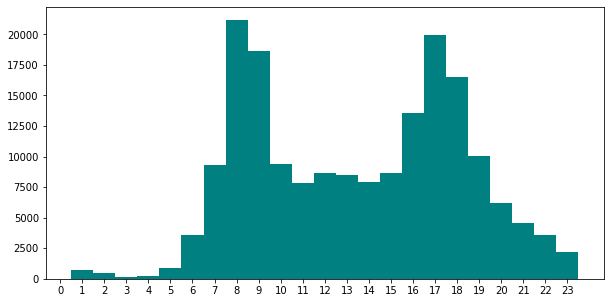

In [143]:
plt.figure(figsize=(10,5))
bins_hour = np.arange(0.5,24.5,1)
plt.hist(df_fordgobike.end_time.apply(lambda x : x.hour),bins=bins_hour,color='teal')
plt.xticks(np.arange(0,24,1));

As it can be seen, most of the users use the bike during the rush hours around 7 AM to 9 AM in the morning and also 4PM to 6PM in the evening. Later, we will try to relate the locations where the bikes get picked up most during rush hours.

Now we will try to see what days do these bikes get picked up the most

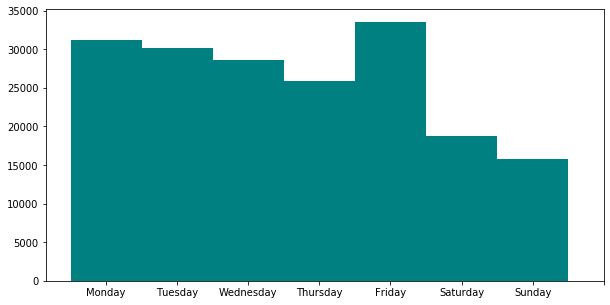

In [144]:
plt.figure(figsize=(10,5))
bins_day = np.arange(-0.5,7.5,1)
bins_day_ticks = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.hist(df_fordgobike.start_time.apply(lambda x : x.dayofweek),bins=bins_day,color='teal')
plt.xticks(np.arange(0,8,1),bins_day_ticks);

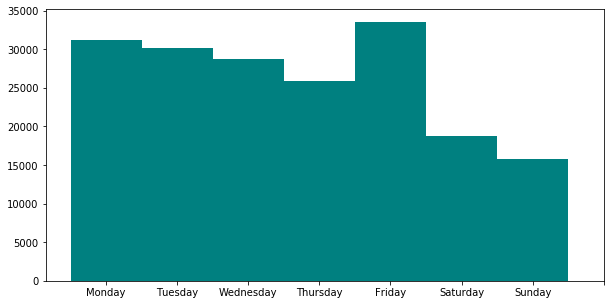

In [145]:
plt.figure(figsize=(10,5))
bins_day = np.arange(-0.5,7.5,1)
bins_day_ticks = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.hist(df_fordgobike.end_time.apply(lambda x : x.dayofweek),bins=bins_day,color='teal')
plt.xticks(np.arange(0,8,1),bins_day_ticks);

As seen above, the bikes are most used during the weekdays and used less often during weekends. It will be interesting to see how the day of the week relates to the time spent on the bike and also the location where it was used.

Now let us try to see the distribution of users - if the users are subscribers (regular users) or if they are casual customers.

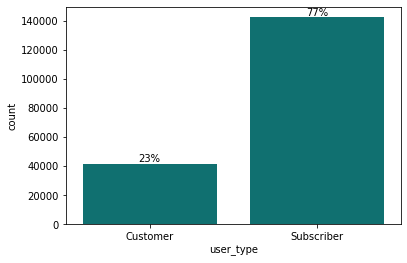

In [146]:
ax = sb.countplot(data=df_fordgobike,x='user_type',color='teal')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{0:.0%}'.format(height/len(df_fordgobike)),
            ha="center",va='bottom');

It can be seen that 77% of the users are subscribers of the Ford GoBike services. It will be interesting to see how the distribution of users span with the amount of time the bike is used and also based on location. Also, we can compare this to the time and day of the bike usage.

Now we will plot the number of times the **Bike Share for All program** was used. This program is for Bay Area residents who qualify for CalFresh, SFMTA Lifeline Pass, or PG&E CARE utility discount who can avail services for $5 for the first year

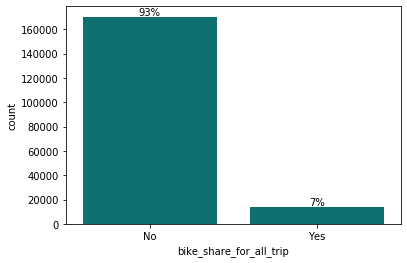

In [147]:
ax = sb.countplot(data=df_fordgobike,x='bike_share_for_all_trip',color='teal')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{0:.0%}'.format(height/len(df_fordgobike)),
            ha="center",va='bottom');

It can be seen that only 7% of the users have prevailed the bike share for all program.

In [148]:
df_fordgobike['start_lat_long'] = list(zip(df_fordgobike.start_station_latitude, df_fordgobike.start_station_longitude))
df_fordgobike['end_lat_long'] = list(zip(df_fordgobike.end_station_latitude, df_fordgobike.end_station_longitude))

In [149]:
import gmaps

In [150]:
gmaps.configure(api_key='YourAPIKey')
heatmap_layer = gmaps.heatmap_layer(df_fordgobike['start_lat_long'])
heatmap_layer.max_intensity = 700
heatmap_layer.point_radius = 8
fig = gmaps.figure(map_type='HYBRID')
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [151]:
gmaps.configure(api_key='YourAPIKey')
heatmap_layer = gmaps.heatmap_layer(df_fordgobike['end_lat_long'])
heatmap_layer.max_intensity = 700
heatmap_layer.point_radius = 8
fig = gmaps.figure(map_type='HYBRID')
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

So, it can be seen from the heatmap representation above that most users are from the San Francisco bay area and a sizeable users from the Oakland and San Jose area too. It would be interesting to plot this heatmap with varying days, time and duration

### Conclusion on the distributions of variables of interest. 
> The conclusions from the explorations of individual variables are mentioned below:
<br> 1) Most of the rentals are around 500 seconds and very few above 3000 seconds.
<br> 2) Most rentals happen around the peak hours of 7AM to 9AM and in the evening around 4PM to 6PM
<br> 3) Rentals are higher during the weekdays and less in the weekends
<br> 4) 77% of users are subscribers and only 23% are irregular customers
<br> 5) Only 7% of users have availed the "Bike share for all" program.
<br> 6) Most users are from the San Francisco bay area and a sizeable users from the Oakland and San Jose area too.
<br> <br>The distributions of the various variables were in most cases as expected. However, we saw a couple of cases where we saw some anamolies such as the duration of the rental which had a couple of entries in the extreme right end. Thus we plotted the values on the logarithmetic scale as well to understand the distribution well. Also, one more interesting thing to see is the rise in number of rentals on Fridays.

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in the data.

First, since the start_time and end_time have entries in the timestamp, it would be useful to create separate columns representing the day and hour for better means of plotting data.

In [152]:
bins_day_ticks = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_fordgobike['start_day'] = df_fordgobike.start_time.apply(lambda x : bins_day_ticks[x.dayofweek])
df_fordgobike['end_day'] = df_fordgobike.end_time.apply(lambda x : bins_day_ticks[x.dayofweek])

In [153]:
df_fordgobike['start_hour'] = df_fordgobike.start_time.apply(lambda x : x.hour)
df_fordgobike['end_hour'] = df_fordgobike.end_time.apply(lambda x : x.hour)

Now that we have the values, we can begin with the scatter plot of the duration of the bike rental with respect to the days.

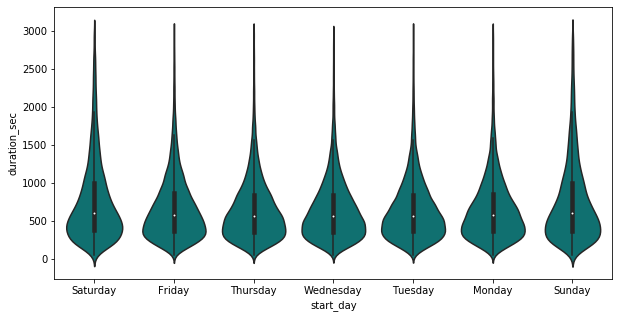

In [154]:
plt.figure(figsize = [10, 5])
sb.violinplot(data = df_fordgobike[df_fordgobike.duration_sec < 3000], x = 'start_day', y = 'duration_sec', alpha = 1/10,color='teal');

In [155]:
def histogram_plot_duration(df_data,day):
    plot = plt.figure(figsize = [8, 4])
    bin_edges = 10 ** np.arange(0.8, np.log10(df_data.duration_sec.max())+0.1, 0.1)
    plt.hist(df_data.duration_sec, bins = bin_edges,color='teal')
    plt.xscale('log')
    tick_locs = [10, 30, 100, 300, 1000, 3000,10000,30000,100000]
    plt.xticks(tick_locs, tick_locs)
    plt.xlabel('Bike Rental Duration (in seconds)');
    plt.title(day)
    return plot

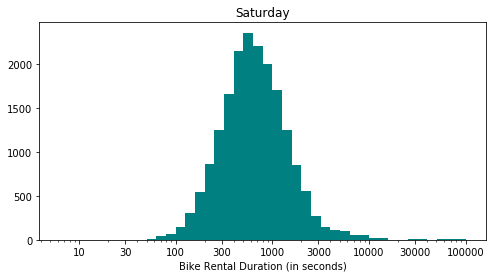

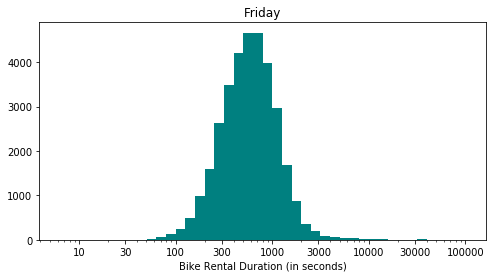

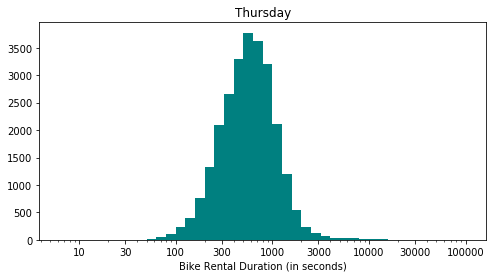

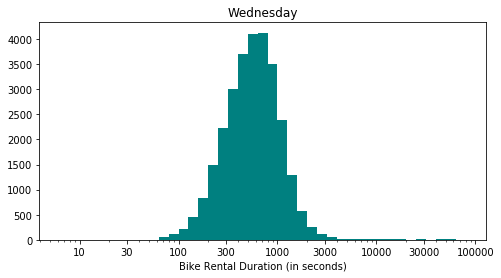

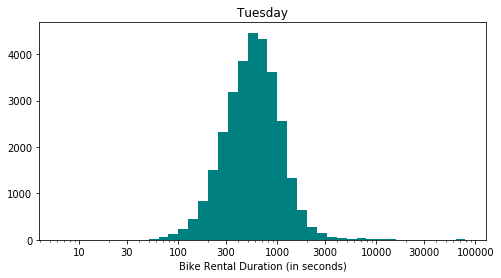

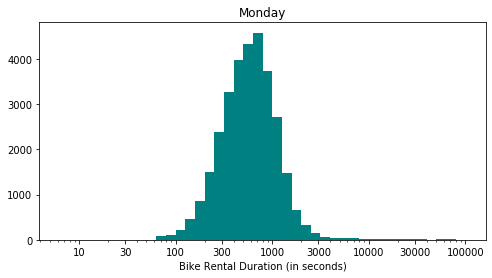

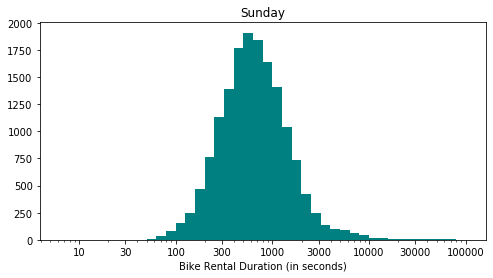

In [156]:
for i,day in enumerate(df_fordgobike.start_day.unique()):
    df_data = df_fordgobike[df_fordgobike.start_day == day]
    histogram_plot_duration(df_data,day)

It can be clearly seen that the higher rental durations are mostly during weekends. To support our argument, let us just plot the above plots for only weekdays and weekends

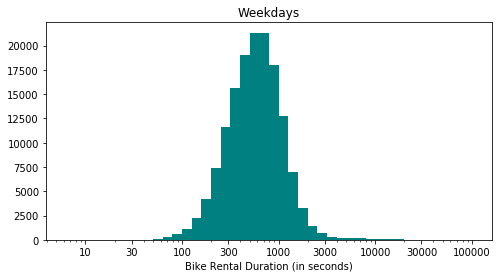

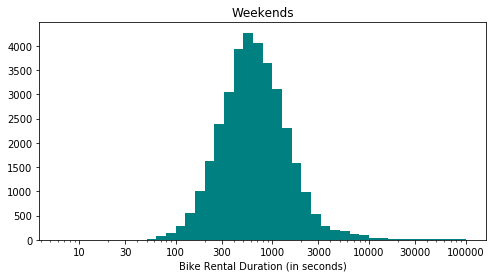

In [157]:
df_data_weekdays = df_fordgobike[(df_fordgobike.start_day != 'Saturday') & (df_fordgobike.start_day!='Sunday')]
histogram_plot_duration(df_data_weekdays,'Weekdays')
df_data_weekends = df_fordgobike[(df_fordgobike.start_day == 'Saturday') | (df_fordgobike.start_day == 'Sunday')]
histogram_plot_duration(df_data_weekends,'Weekends');

Now let us plot the relationship of the duration with respect to the hour of the rental

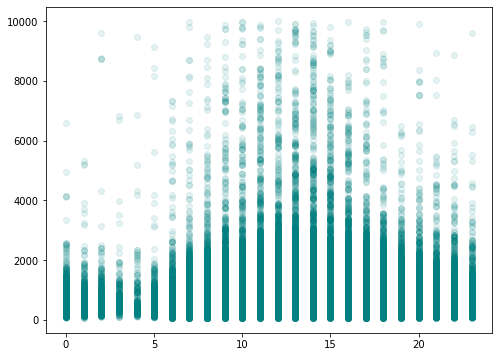

In [158]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df_fordgobike[df_fordgobike.duration_sec < 10000], x = 'start_hour', y = 'duration_sec', alpha = 1/10,color='teal');

So it is during the mid hours around 10AM to 2PM where the duration of the bike rental was high.

Now let us have a look at the distribution of the heatmap for the days vs hours

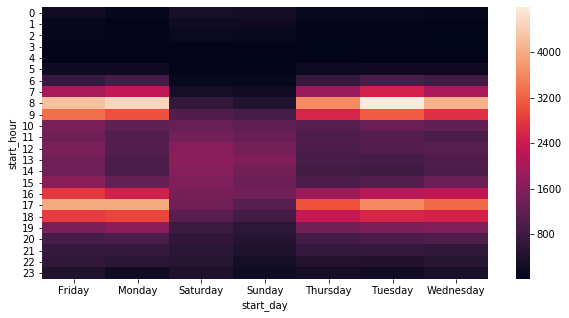

In [159]:
data_counts = df_fordgobike.groupby(['start_hour', 'start_day']).size()
data_counts = data_counts.reset_index(name='count')
data_counts = data_counts.pivot(index = 'start_hour', columns = 'start_day', values = 'count')
plt.figure(figsize = [10, 5])
sb.heatmap(data_counts);

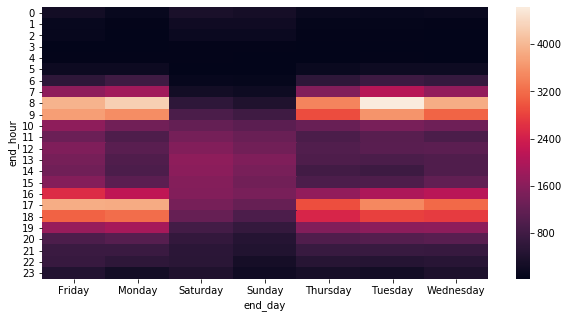

In [160]:
data_counts = df_fordgobike.groupby(['end_hour', 'end_day']).size()
data_counts = data_counts.reset_index(name='count')
data_counts = data_counts.pivot(index = 'end_hour', columns = 'end_day', values = 'count')
plt.figure(figsize = [10, 5])
sb.heatmap(data_counts);

It can be seen very distinctly that the bike rentals have a high usage during the peak hours only in the weekdays. Saturdays and Sundays have more bike rentals inface near the afternoon

Now let us try to see the locations based on the days.

In [161]:
gmaps.configure(api_key='YourAPIKey')
df_data_weekdays = df_fordgobike[(df_fordgobike.start_day != 'Saturday') & (df_fordgobike.start_day!='Sunday')]
heatmap_layer = gmaps.heatmap_layer(df_data_weekdays['start_lat_long'])
heatmap_layer.max_intensity = 700
heatmap_layer.point_radius = 8
fig = gmaps.figure(map_type='HYBRID')
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [162]:
gmaps.configure(api_key='YourAPIKey')
df_data_weekends = df_fordgobike[(df_fordgobike.start_day == 'Saturday') | (df_fordgobike.start_day == 'Sunday')]
heatmap_layer = gmaps.heatmap_layer(df_data_weekends['start_lat_long'])
heatmap_layer.max_intensity = 700
heatmap_layer.point_radius = 8
fig = gmaps.figure(map_type='HYBRID')
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

So, it can be seen that the rentals near the bay area are lesser during weekends but, the rental in the Oakland area and San Jose are significantly less in weekends.

Now, it will be interesting to see the areas where bikes were rented for long durations. ie) greater than 3000 seconds

In [163]:
gmaps.configure(api_key='YourAPIKey')
df_data_long_hours = df_fordgobike[df_fordgobike.duration_sec>3000]
heatmap_layer = gmaps.heatmap_layer(df_data_long_hours['start_lat_long'])
heatmap_layer.max_intensity = 400
heatmap_layer.point_radius = 8
fig = gmaps.figure(map_type='HYBRID')
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

So, the users in San Jose and Oakland area very seldom use the bike for over 3000 seconds. Only a certain areas in the bay area have seen users renting the bike for more than 3000 seconds.

Now, let us look at the duration of rentals that subscribers usually take the bike for.

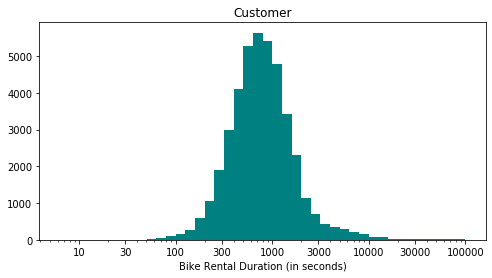

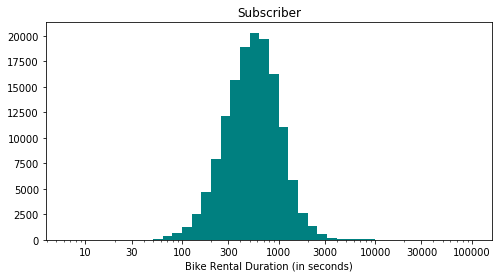

In [164]:
for i,user in enumerate(df_fordgobike.user_type.unique()):
    df_data = df_fordgobike[df_fordgobike.user_type == user]
    histogram_plot_duration(df_data,user)

From the above plots, we can conclude that the subscribers usually use the bike for regular commute which is less than 3000 seconds. The irregular customers contribute to longer rental times.

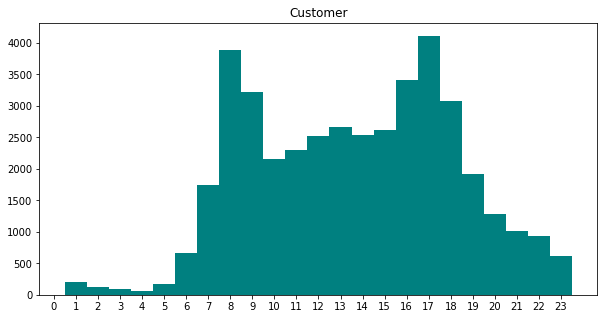

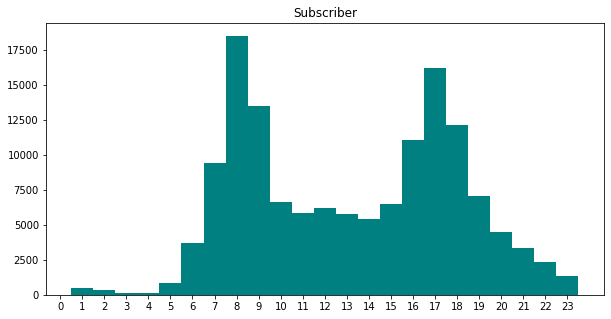

In [165]:
bins_hour = np.arange(0.5,24.5,1)
for i,user in enumerate(df_fordgobike.user_type.unique()):
    df_data = df_fordgobike[df_fordgobike.user_type == user]
    plt.figure(figsize=(10,5))
    plt.hist(df_data.start_time.apply(lambda x : x.hour),bins=bins_hour,color='teal')
    plt.xticks(np.arange(0,24,1));
    plt.title(user)

As seen above, it can be clearly seen that subscribers use the bikes mostly during rush hours, whereas the irregular customers are seen using bikes even during odd hours

Now we can also see the distribution of the bike rentals for different user types with respect to the days of the week

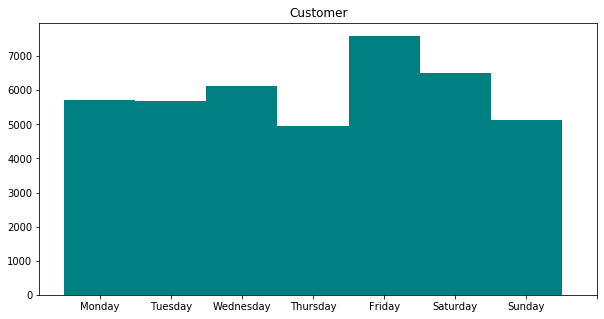

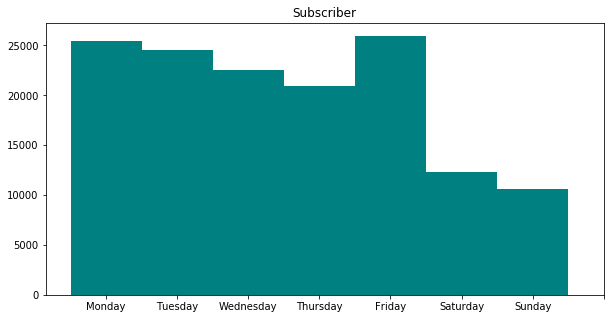

In [166]:
bins_day = np.arange(-0.5,7.5,1)
bins_day_ticks = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i,user in enumerate(df_fordgobike.user_type.unique()):
    df_data = df_fordgobike[df_fordgobike.user_type == user]
    plt.figure(figsize=(10,5))
    plt.hist(df_data.start_time.apply(lambda x : x.dayofweek),bins=bins_day,color='teal')
    plt.xticks(np.arange(0,8,1),bins_day_ticks);
    plt.title(user)

As seen above, it can be clearly seen that subscribers use the bikes mostly during weekdays, whereas the irregular customers are seen using bikes more during weekends

Now, let us see the locations based on the subscribers and the irregular customers

In [167]:
gmaps.configure(api_key='YourAPIKey')
df_data_subscribers = df_fordgobike[df_fordgobike.user_type=='Subscriber']
heatmap_layer = gmaps.heatmap_layer(df_data_subscribers['start_lat_long'])
heatmap_layer.max_intensity = 700
heatmap_layer.point_radius = 8
fig = gmaps.figure(map_type='HYBRID')
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [168]:
gmaps.configure(api_key='YourAPIKey')
df_data_customers = df_fordgobike[df_fordgobike.user_type=='Customer']
heatmap_layer = gmaps.heatmap_layer(df_data_customers['start_lat_long'])
heatmap_layer.max_intensity = 700
heatmap_layer.point_radius = 8
fig = gmaps.figure(map_type='HYBRID')
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

It can be seen that the irregular customers are rare in the Oakland and San Jose areas. 

### Conclusions from the bivariate explorations:
> From our above explorations of 2 variables with each other, the findings are mentioned below:
<br> 1) Longer rental durations are more common during weekends than on weekdays
<br> 2) Longer rentals are more common around 10Am to 2PM
<br> 3) Higher count of rentals during weekdays are during the peak hours (7AM to 9AM and 4PM to 6PM) and higher counts of rentals during weekends are in the afternoon around 12PM
<br> 4) The rentals near the bay area are lesser during weekends but, the rental in the Oakland area and San Jose are significantly less in weekends.
<br> 5) Users in San Jose and Oakland area very seldom use the bike for over 3000 seconds
<br> 6) Subscribers usually use the bike for regular commute which is less than 3000 seconds. The irregular customers contribute to longer rental times
<br> 7) Subscribers use the bikes mostly during rush hours and during weekdays, whereas the irregular customers are seen using bikes even during odd hours and more during weekends.
<br> 8) Irregular customers are rare in the Oakland and San Jose areas.

## Multivariate Exploration

> In this section, we will investigate relationships between multiple variables in the data.

Now, it will be interesting to see how the distributions are with respect to the 3 regions where the Ford GoBikes are used - The Sanfrancisco area, San Jose area and the Oakland area. For that, we need to first classify them.

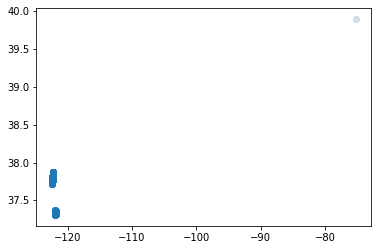

In [169]:
plt.scatter(data=df_fordgobike,x='start_station_longitude',y='start_station_latitude',alpha=0.1);

In [170]:
len(df_fordgobike[df_fordgobike.start_station_longitude>-80])

2

Looks like there are 2 outliers. We will remove them first

In [171]:
df_fordgobike = df_fordgobike[df_fordgobike.start_station_longitude<-80]

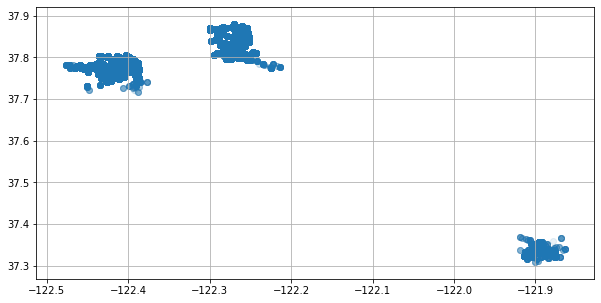

In [172]:
plt.figure(figsize=(10,5))
plt.scatter(data=df_fordgobike,x='start_station_longitude',y='start_station_latitude',alpha=0.05);
plt.grid();

In [173]:
def location(row):
    if row['start_station_longitude']<-122.35:
        return 'San_Francisco'
    elif row['start_station_longitude']<-122.2:
        return 'Oakland'
    elif row['start_station_longitude']<-121.8:
        return 'San_Jose'
    else:
        return 'Other'

In [174]:
df_fordgobike['location'] = df_fordgobike.apply(lambda row: location(row),axis=1)

In [175]:
df_fordgobike.location.value_counts()

San_Francisco    140350
Oakland           34210
San_Jose           9524
Name: location, dtype: int64

Now, we can see what the statistics are with respect to the location and the usage based on days of the week and hour of the day.

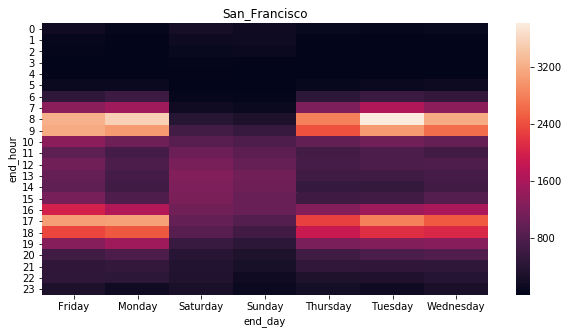

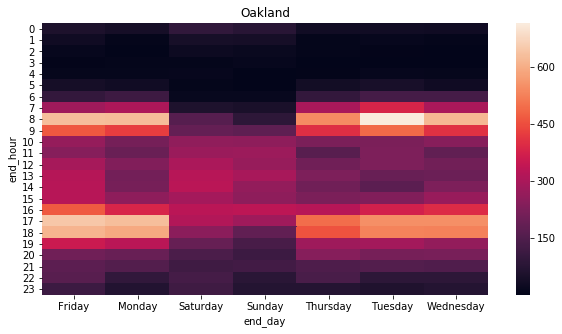

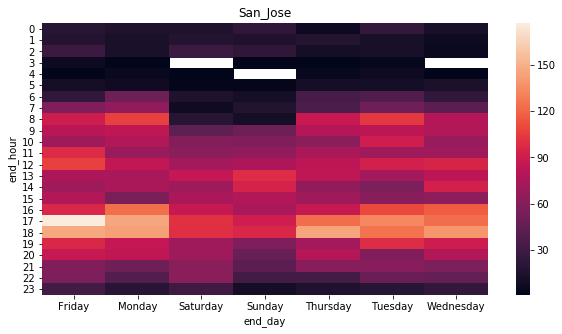

In [176]:
for i,locn in enumerate(df_fordgobike.location.unique()):
    data_counts = df_fordgobike[df_fordgobike.location == locn].groupby(['end_hour', 'end_day']).size()
    data_counts = data_counts.reset_index(name='count')
    data_counts = data_counts.pivot(index = 'end_hour', columns = 'end_day', values = 'count')
    plt.figure(figsize = [10, 5])
    sb.heatmap(data_counts);
    plt.title(locn)

It is suprising to see that the users in San Jose dont necessarily use the rental services only during peak hours. Only San Francisco exhibits that hypothesis strongly

We can also see what is the distribution of the subscribers with respect to the location

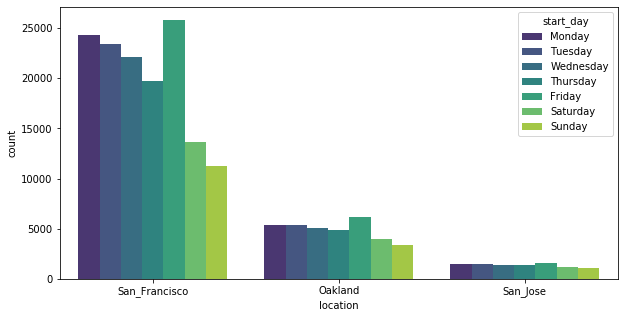

In [177]:
fig, ax = plt.subplots(figsize = (10,5))
sb.countplot(data = df_fordgobike,x = "location",  palette = "viridis", hue = "start_day",hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);

It can be seen that San Jose does has users relatively spread accross the week in comparison to San Francisco and Oakland

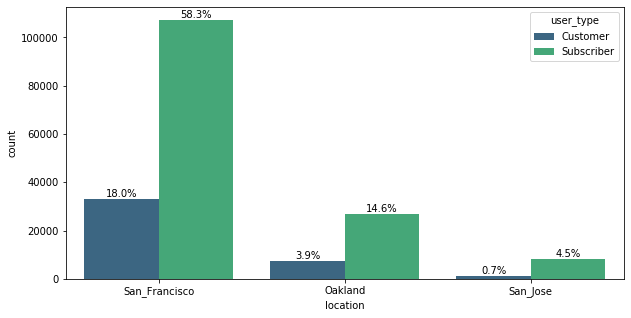

In [178]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sb.countplot(data = df_fordgobike,x = "location",  palette = "viridis", hue = "user_type");
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(df_fordgobike)), (x.mean(), y), 
            ha='center', va='bottom')

We can see that San Jose does not have many irregular customers. Most customers are subscribers in the area. But suprisingly, San Jose users do not also use the rental bikes only during rush hours

Now, let us have a look at the distribution of the duration of bike rentals with respect to location

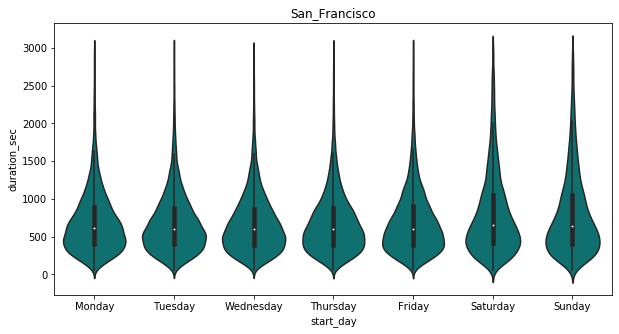

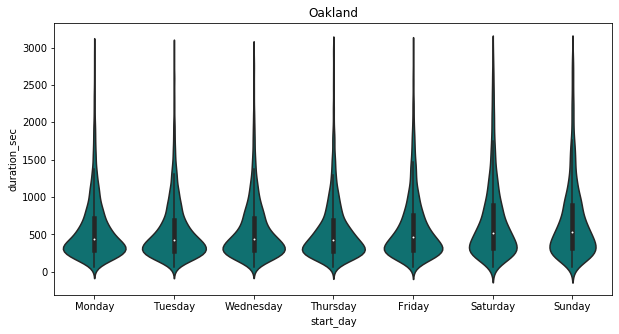

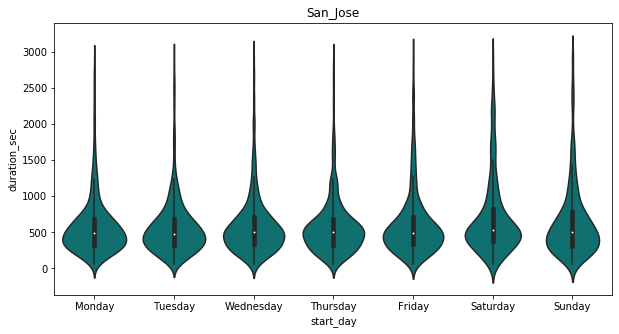

In [179]:
for locn in df_fordgobike.location.unique():
    plt.figure(figsize = [10, 5])
    sb.violinplot(data = df_fordgobike[(df_fordgobike.duration_sec < 3000) & (df_fordgobike.location == locn)], x = 'start_day', y = 'duration_sec', order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],alpha = 1/10,color='teal');
    plt.title(locn)

We can see that San Francisco has users with higher rental hours in the weekends.

<Figure size 1440x720 with 0 Axes>

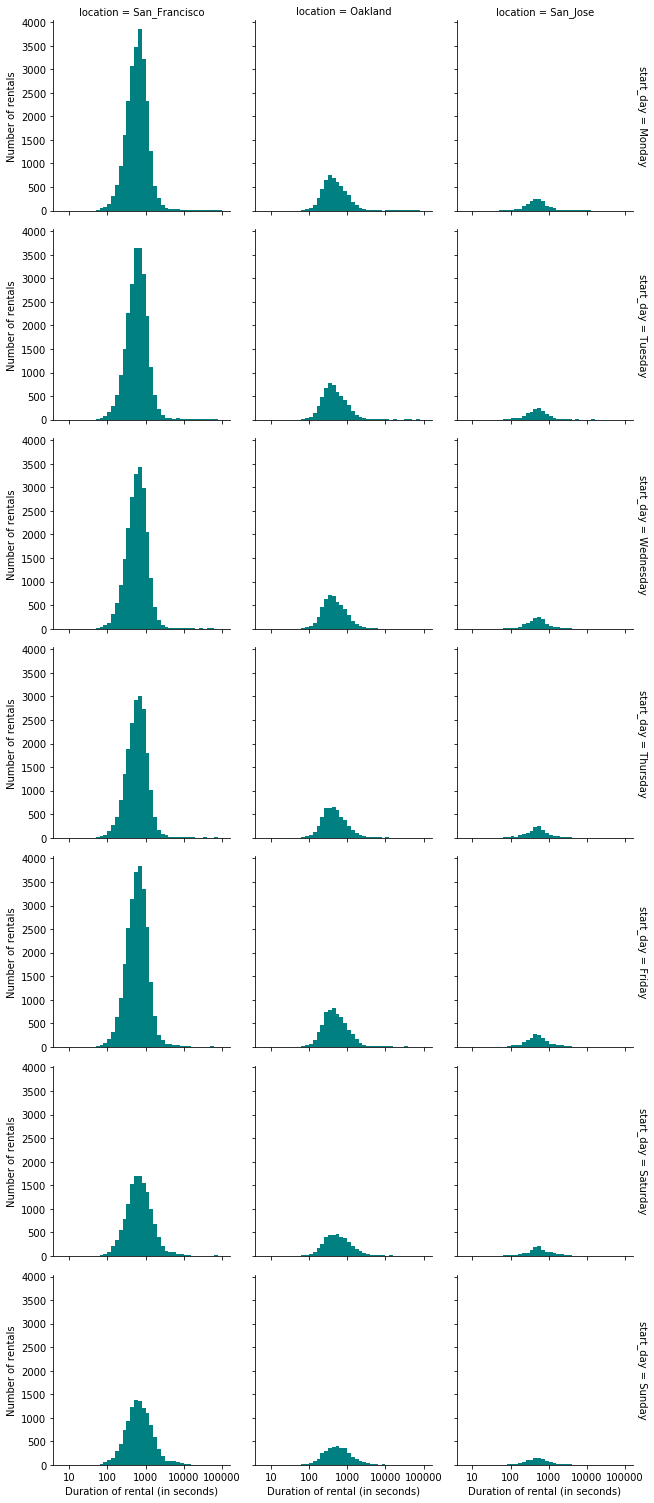

In [180]:
bin_edges = 10 ** np.arange(0.8, np.log10(df_fordgobike.duration_sec.max())+0.1, 0.1)
fig = plt.figure(figsize=(20,10))
g = sb.FacetGrid(data = df_fordgobike, col = 'location', row = 'start_day',row_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], margin_titles = True)
g.map(plt.hist, 'duration_sec', bins=bin_edges,color = 'teal')
plt.xscale('log')
tick_locs = [10,100, 1000,10000,100000]
plt.xticks(tick_locs, tick_locs)
g.set_xlabels('Duration of rental (in seconds)')
g.set_ylabels('Number of rentals')
plt.show();

This plot shows that the duration of the rental service follows a narrower peak at around 500 seconds in San Francisco, and is a little more wider at Oakland and is much more flattened at San Jose

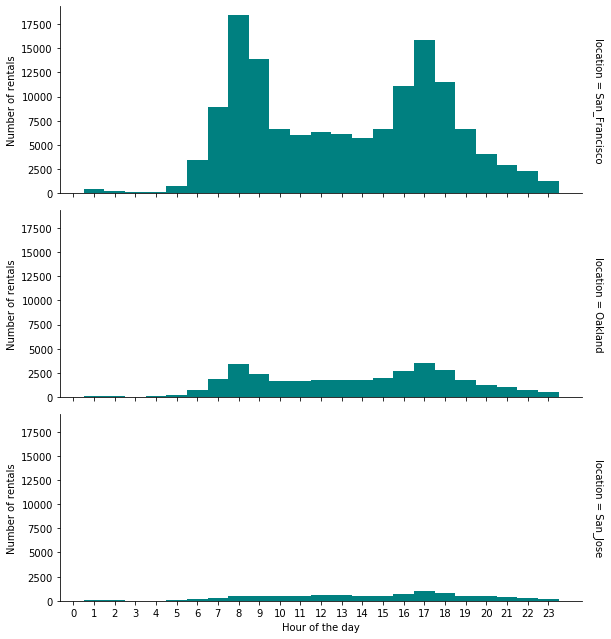

In [181]:
bins_hour = np.arange(0.5,24.5,1)
g = sb.FacetGrid(data = df_fordgobike, row = 'location', margin_titles = True,aspect = 2.8, size=3)
g.map(plt.hist, 'start_hour', bins=bins_hour,color = 'teal')
plt.xticks(np.arange(0,24,1));
g.set_xlabels('Hour of the day')
g.set_ylabels('Number of rentals')
plt.show();

This plot strengthens the earlier argument that San Francisco has more users during the rush hours by a large margin. Oakland   too has users during rush hours, but the distribution is not as drastic as San Francisco's. San Jose on the other hand, has surprisingly a flatter curve and more users in the evening than in the morning

### Conclusions from multivariate explorations:

> From the above explorations, we can say,
<br> 1) San Francisco has most users during peak hours and in weekdays. Oakland follows a similar curve, but is not as drastic. Suprisingly, the users in San Jose dont necessarily use the rental services only during peak hours and weekdays.
<br> 2) The ratio of subscribers over irregular customers in San Francisco, Oakland and San Jose are around 3.2, 3.7 and 6.42. This shows San Jose has very less number of irregular customers
<br> 3) The duration of the rental service follows a narrower peak at around 500 seconds in during weekdays particularly in San Francisco, and the distribution gets a little more wider in weekends and as we move to Oakland. It is much more flattened at San Jose in comparison to the other two locations.

## Overall Summary

> From the above analysis of the Ford GoBike data, we can say that most of the rentals are around 500 seconds and very few above 3000 seconds. A very few number of users are also seen booking the bike for long hours. Moreover, the service can be seen availed from San Francisco, Oakland and San Jose in California. San Francisco has the highest number of users (around 75%) followed by Oakland (with 20%) and finally San Jose (with 5%). Most rentals happen around the peak hours of 7AM to 9AM and in the evening around 4PM to 6PM and are more during the weekdays than on weekends. But this relationship is stronger for San Francisco and is weaker in Oakland and is weakest in San Jose. It can be seen that most users of the Ford GoBike services are Subscribers and a very few are irregular customers. The subscribers use the services primarily during peak hours and on weekdays, thus supporting the statement made above. Irregular customers on the other hand use the services more during weekends and also during odd hours. Surprisingly though, on the other hand, San Francisco has a higher percentage of irregular customers using the rental service than subscribers in comparison to the Oakland and San Jose area. But due to the sheer number of users in San Francisco, the overall usage statistics is maintained. Another interesting diversion from usual stats can be seen in San Jose, where the subscribers are seen using the service throughout the day and not only during peak hours. 